In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fake-news-detection/data.h5
/kaggle/input/fake-news-detection/data.csv


# **Libraries**

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Data**

In [46]:
df = pd.read_csv('/kaggle/input/fake-news-detection/data.csv')  
df_sample = df.sample(n=2000, random_state=42)
df.head(5)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [47]:
print(df_sample.isnull().sum())

df_sample['Headline'].fillna('', inplace=True)
df_sample['Body'].fillna('', inplace=True)

df_sample['News'] = df_sample['Headline'] + ' ' + df_sample['Body']

URLs         0
Headline     0
Body        11
Label        0
dtype: int64


/tmp/ipykernel_30/1433723353.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sample['Headline'].fillna('', inplace=True)
/tmp/ipykernel_30/1433723353.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [48]:
df_sample.head(5)

,URLs,Headline,Body,Label,News
2580,https://www.reuters.com/article/us-mediaset-vi...,Mediaset and Vivendi in contact over pay-TV di...,FILE PHOTO: A woman walks walk past the main e...,1,Mediaset and Vivendi in contact over pay-TV di...
3660,http://www.bbc.com/news/world-asia-41521260\r\n,Nobel prize: Chronicle of wound-up 'Harukists'...,Image copyright AFP/Getty Images Image caption...,1,Nobel prize: Chronicle of wound-up 'Harukists'...
897,http://www.cnn.com/2017/10/05/world/gallery/we...,The week in 35 photos,US Secretary of State Rex Tillerson makes a st...,1,The week in 35 photos US Secretary of State Re...
2091,http://beforeitsnews.com/sports/2017/09/florid...,Florida State’s season is in a heap of trouble.,Florida State’s season is in a heap of trouble...,0,Florida State’s season is in a heap of trouble...
1044,http://beforeitsnews.com/u-s-politics/2017/09/...,America Needs a New News Source,America Needs a New News Source\n(Before It's ...,0,America Needs a New News Source America Needs ...


In [49]:
X = df_sample['News']
y = df_sample['Label']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Vectorization using TF-IDF**

In [51]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# **Confusion Matrix Function**

In [52]:
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# **Random Forest**

In [53]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

Random Forest Classification Report:
              precision    recall  f1-score   support

    Not Fake       0.98      0.97      0.97       217
        Fake       0.97      0.97      0.97       183

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



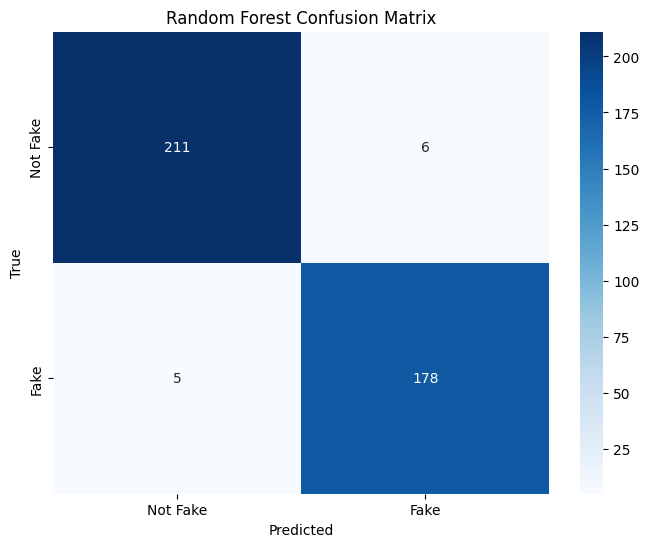

In [54]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Not Fake', 'Fake']))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

# **SVM Model**

In [55]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

SVM Classification Report:
              precision    recall  f1-score   support

    Not Fake       0.97      0.98      0.97       217
        Fake       0.97      0.96      0.97       183

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



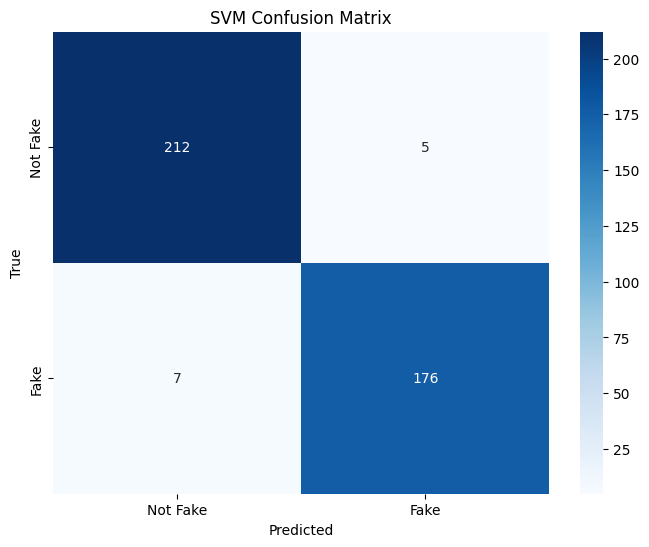

In [56]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Not Fake', 'Fake']))
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")

# **Decision Tree**

In [57]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)

Decision Tree Classification Report:
              precision    recall  f1-score   support

    Not Fake       0.94      0.95      0.94       217
        Fake       0.94      0.93      0.93       183

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



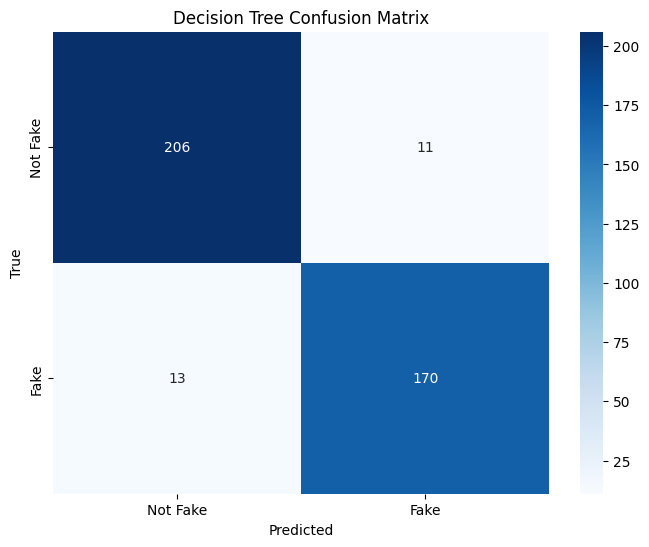

In [58]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Fake', 'Fake']))
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")